In [7]:
import pandas as pd
import numpy as np
import math
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn import tree
import matplotlib.pyplot as plt

df = pd.read_excel('Book.xlsx')
df

,age,income,student,credit_rating,buys_computer
0,<=30,high,no,fair,no
1,<=30,high,no,excellent,no
2,31...40,high,no,fair,yes
3,>40,medium,no,fair,yes
4,>40,low,yes,fair,yes
5,>40,low,yes,excellent,no
6,31...40,low,yes,excellent,yes
7,<=30,medium,no,fair,no
8,<=30,low,yes,fair,yes
9,>40,medium,yes,fair,yes


A1. For the data table provided below, calculate the entropy associated with each attribute / feature 
at the root node. Using this information, identify the first feature that you’d select for constructing 
the decision tree. Use Information Gain as the impurity measure to identify the root node.
‘buys_computer’ is the class label.

In [23]:
def entropy(df):
    counts = df.value_counts()
    prob = counts / len(df)
    entropy = -sum(prob * prob.apply(math.log2))
    return entropy

target_entropy = entropy(df['buys_computer'])


def calculate_information_gain(df, target_entropy, attribute):
    attribute_values = df[attribute].unique()
    attribute_entropy = 0
    
    for value in attribute_values:
        subset = df[df[attribute] == value]
        subset_entropy = entropy(subset['buys_computer'])
        probability_entropy = len(subset) / len(df)
        attribute_entropy += probability_entropy * subset_entropy
    
    information_gain = target_entropy - attribute_entropy
    return information_gain

attributes = df.columns[0:4]
information_gains = {}

for attribute in attributes:
    information_gains[attribute] = calculate_information_gain(df, target_entropy, attribute)
    print(f"Information gain of {attribute}: {calculate_information_gain(df, target_entropy, attribute)}")


root_node = max(information_gains, key=information_gains.get)
print("The perfect node for contructing the decision tree is:", root_node)

Information gain of age: 0.24674981977443933
Information gain of income: 0.02922256565895487
Information gain of student: 0.15183550136234159
Information gain of credit_rating: 0.04812703040826949
The perfect node for contructing the decision tree is: age


A2. Create a Decision Tree for the above data. Get the depth of the constructed tree.

In [25]:
map = {
    'age': {'<=30': 0, '31...40': 1, '>40': 2},
    'income': {'low': 0, 'medium': 1, 'high': 2},
    'student': {'no': 0, 'yes': 1},
    'credit_rating': {'fair': 0, 'excellent': 1},
    'buys_computer': {'no': 0, 'yes': 1}
}

df = df.replace(mapping)

X = df.iloc[:,0:4]
y = df["buys_computer"]

model= DecisionTreeClassifier()
model.fit(X,y)

print(f"Accuracy of this model: {model.score(X,y)}")
print(f"Depth of this model: {model.get_depth()}")

Accuracy of this model: 1.0
Depth of this model: 4


A3. Visualize the constructed tree with plot_tree() command. Following code snippet for help.

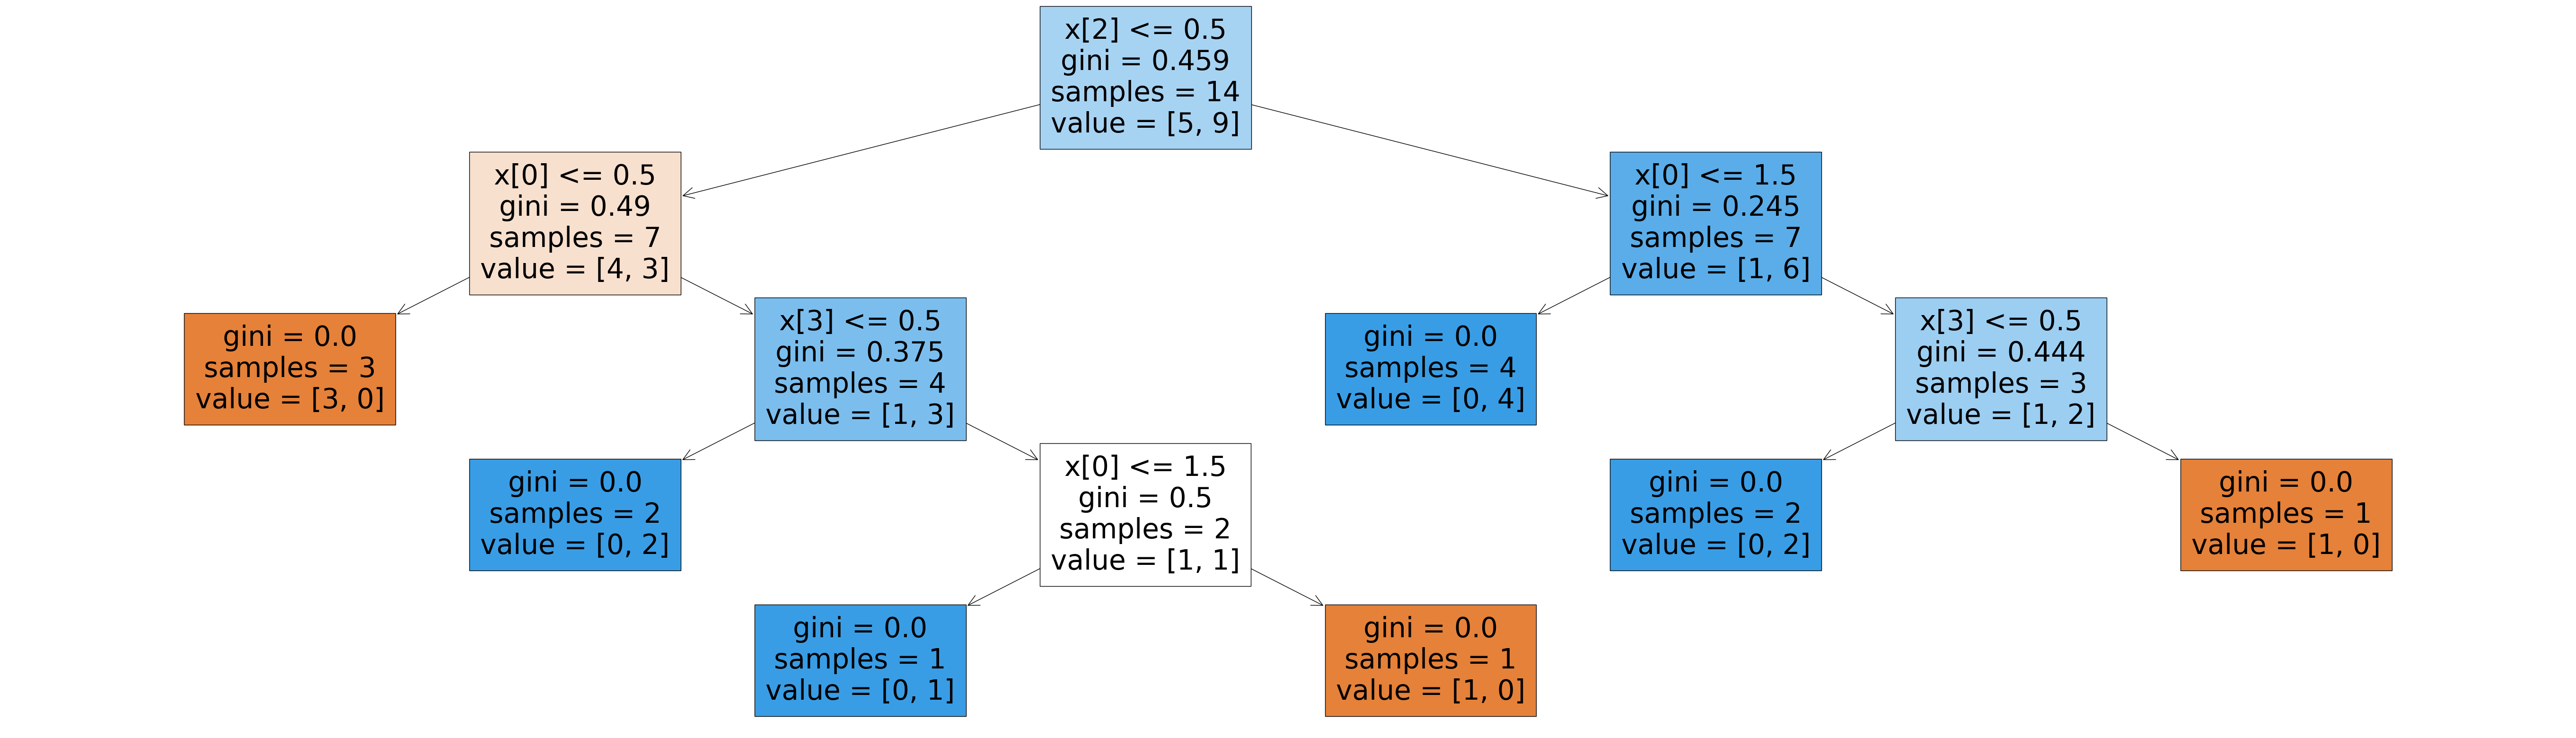

In [27]:
plt.figure(figsize=(70,20)) 
tree.plot_tree(model, filled=True) 
plt.show()

A4. Create a Decision Tree classifier on your project data. Study the accuracy for training and test data and infer the accuracy of tree construction. Plot the Decision Tree obtained above. 

In [36]:
from sklearn.tree import plot_tree
from sklearn.metrics import accuracy_score

df = pd.read_csv('ML_Final_dataset.csv')
df

,User ID,Location,Latitude,Longitude,Weather Condition,Temperature (°C),Humidity (%),Music Genre Preferences
0,1,"Portland, OR",45.5051,-122.6750,Clear,4.50,32.41,"Rock,Alternative"
1,2,"Houston, TX",29.7604,-95.3698,Snowy,30.97,47.91,"Hip-Hop,R&B,Pop"
2,3,"Buffalo, NY",42.8802,-78.8393,Snowy,2.96,35.30,"Rock,Alternative"
3,4,"Boston, MA",42.3601,-71.0589,Sunny,9.33,49.17,"Pop,Rock,Jazz"
4,5,"Hartford, CT",41.7658,-72.6734,Clear,22.41,62.77,"Rock,Alternative"
...,...,...,...,...,...,...,...,...
884989,875138,"Nashville, TN",36.1627,-86.7816,Cloudy,33.67,74.79,"Rock,Alternative"
884990,875139,"Kansas City, MO",39.0997,-94.5786,Sunny,39.67,89.66,"Pop,Rock,Jazz"
884991,875140,"Raleigh, NC",35.7796,-78.6382,Clear,12.25,68.07,"Country,Folk"
884992,875141,"Nashville, TN",36.1627,-86.7816,Sunny,35.62,78.12,"Hip-Hop,R&B,Pop"


In [ ]:
X = df['Humidity (%)']
X_array = X.to_numpy()
X_reshaped = X_array.reshape(-1, 1)
X = X_reshaped
y = df['Music Genre Preferences'] == 'Pop,Rock,Jazz'
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

clf = DecisionTreeClassifier(random_state=42)

clf.fit(X_train, y_train)

model1= DecisionTreeClassifier()
model1.fit(X_train,y_train)

print(f"Accuracy of training model: {model1.score(X_train, y_train)}")
print(f"Accuracy of testing model: {model1.score(X_test, y_test)}")
print(f"Depth of this model: {model1.get_depth()}")

plt.figure(figsize=(70,20)) 
tree.plot_tree(model1, filled=True) 
plt.show()

Accuracy of training model: 0.7995496331689521
Accuracy of testing model: 0.8010387986395429
Depth of this model: 69


A5. Impose a max_depth constraint on the tree construction. Construct the tree again and check the 
accuracies. Visualize the tree constructed with max_depth constraint

Accuracy of training model: 0.7996545573410601
Accuracy of testing model: 0.8007939766251474
Depth of this model: 5


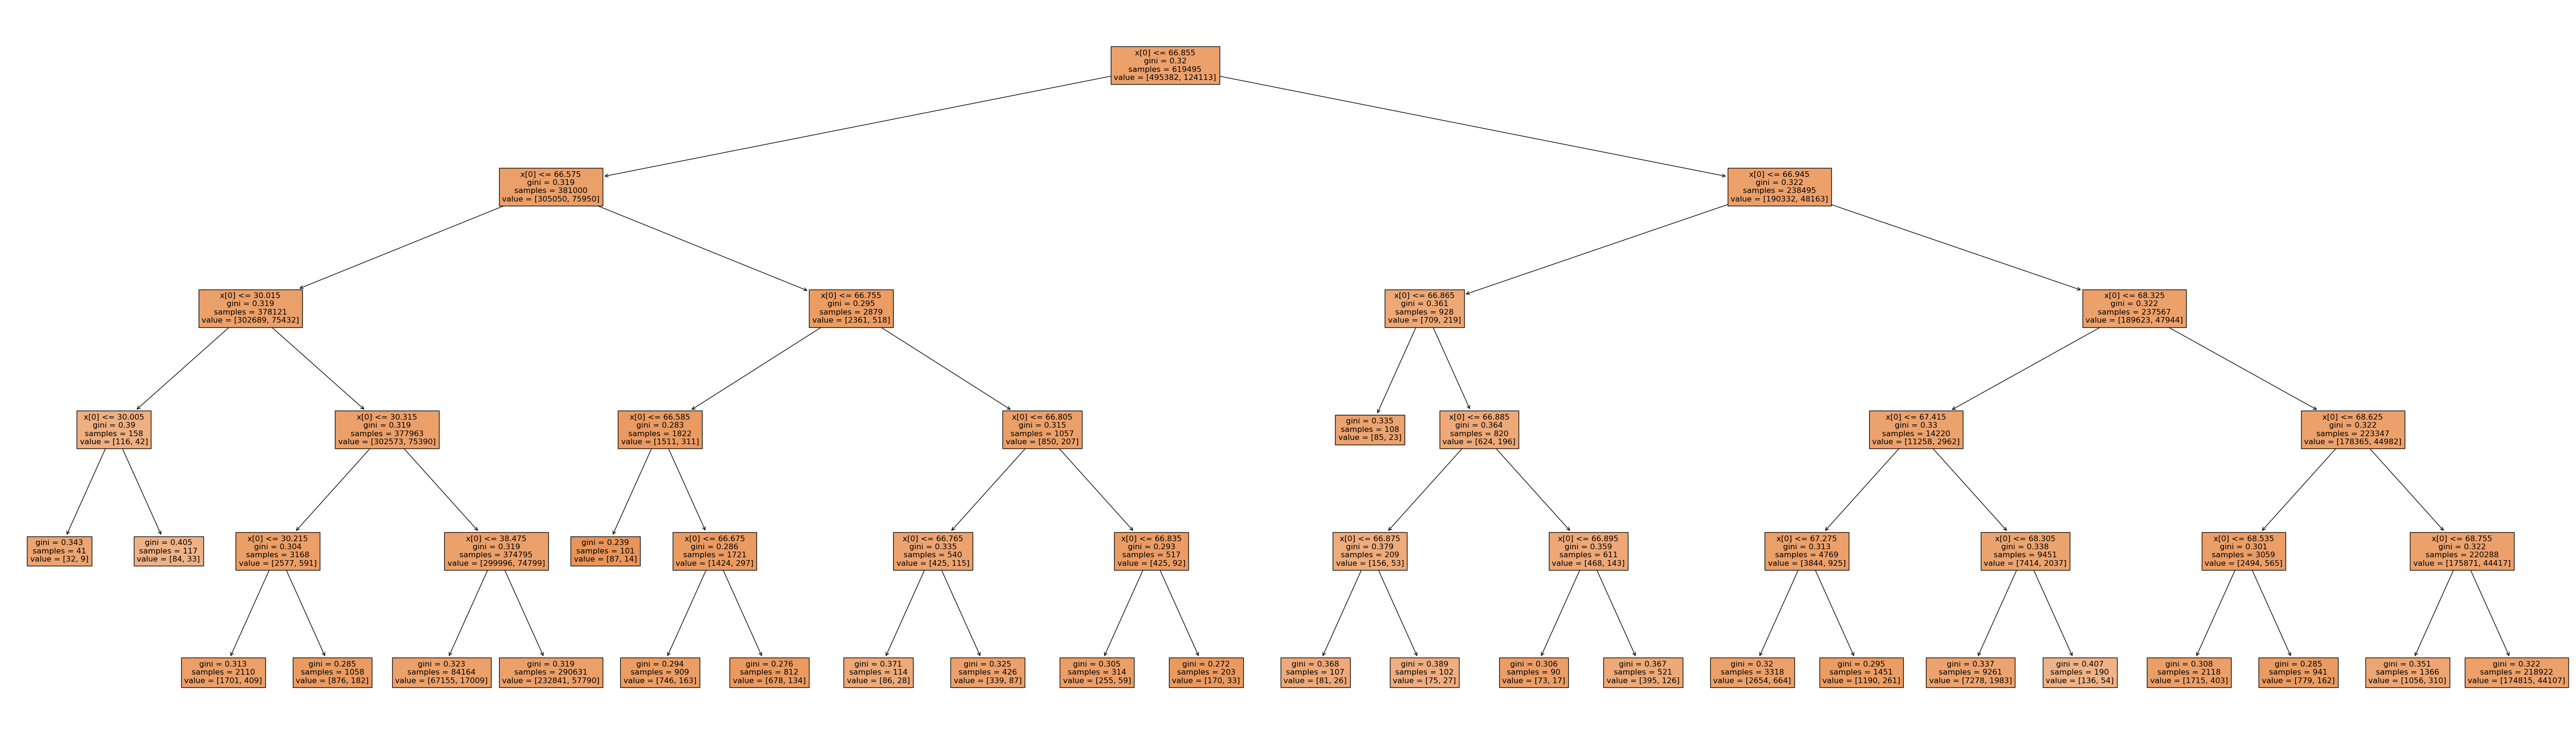

In [52]:
model = DecisionTreeClassifier(max_depth=5)
model.fit(X_train,y_train)

print(f"Accuracy of training model: {model.score(X_train, y_train)}")
print(f"Accuracy of testing model: {model.score(X_test, y_test)}")
print(f"Depth of this model: {model.get_depth()}")

plt.figure(figsize=(70,20)) 
tree.plot_tree(model, filled=True) 
plt.show()

A6. Study the criterion of the DT in the above model. Change the criterion to “Entropy” and study 
the model & graph. Find the differences between the default criterion and entropy criterion. Refer 
code below for criterion.

Accuracy of training model: 0.7996545573410601
Accuracy of testing model: 0.8007939766251474
Depth of this model: 63
Difference between the default criterion and entropy criterion accuracy of training model : 0.0
Difference between the default criterion and entropy criterion accuracy of testing model : 0.0


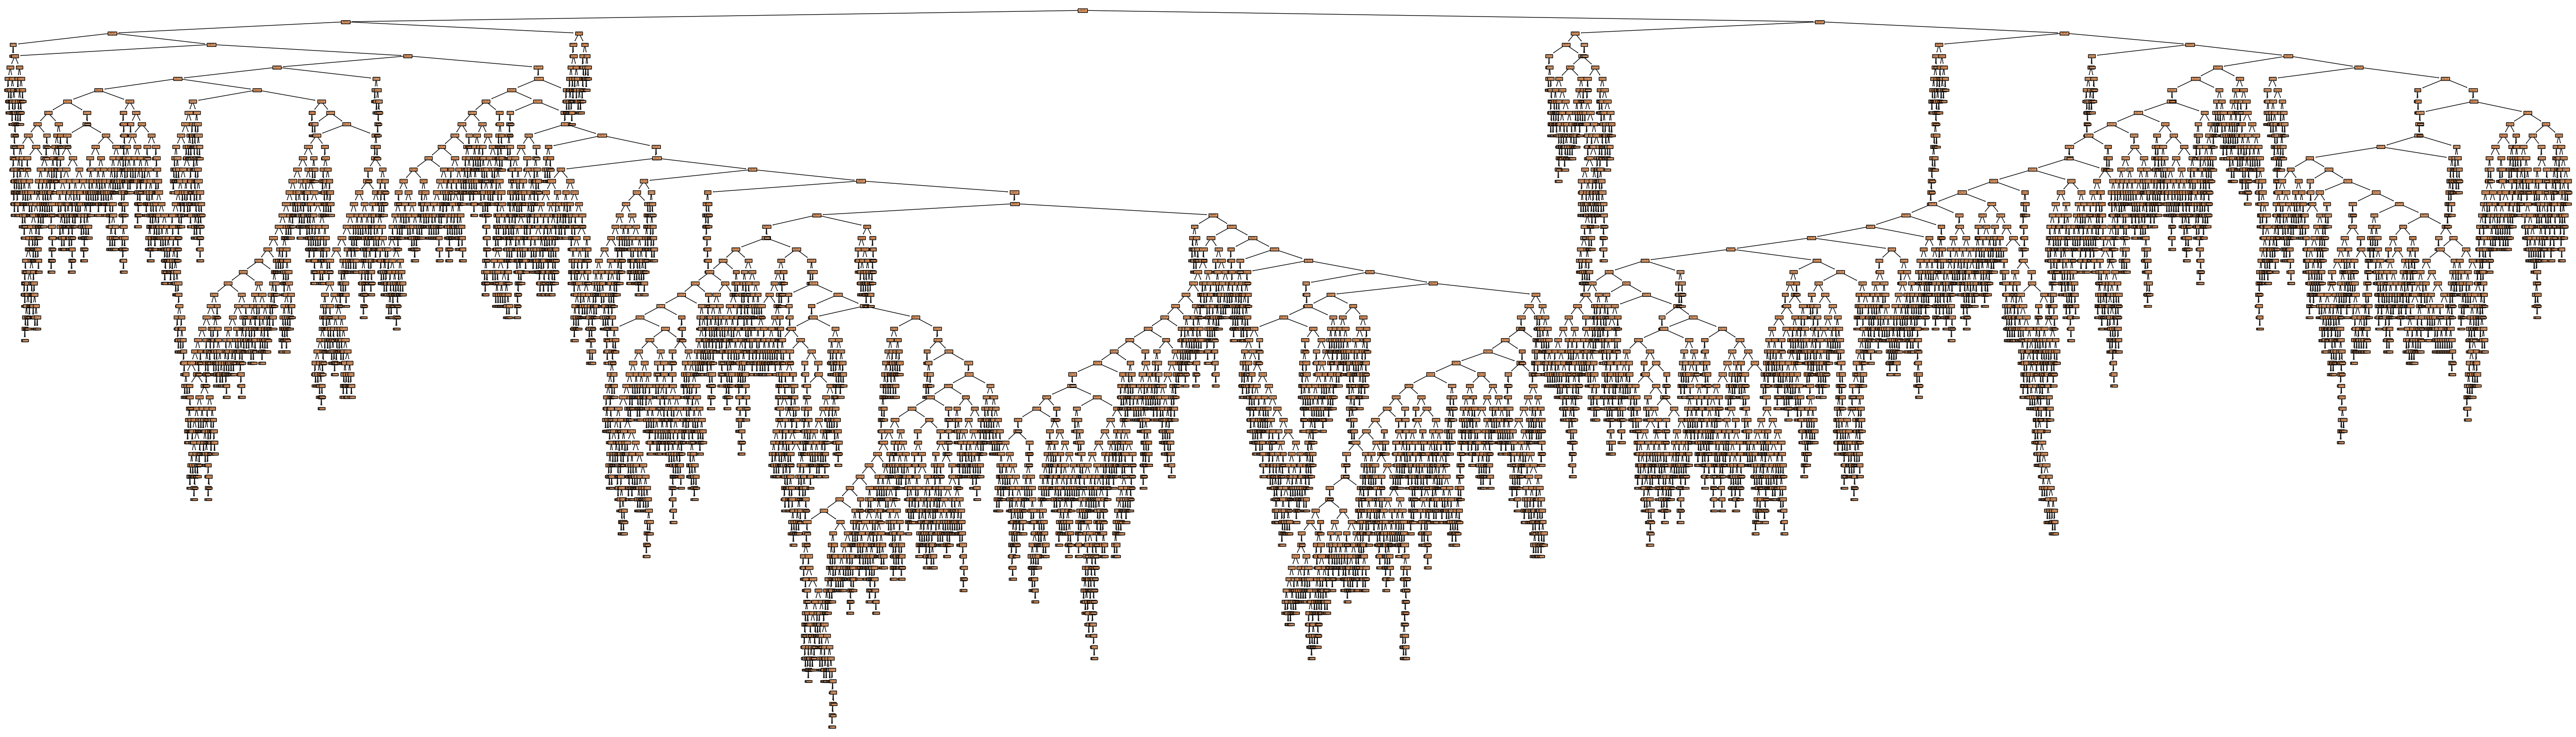

In [54]:
model= DecisionTreeClassifier(criterion="entropy")
model.fit(X_train, y_train)

print(f"Accuracy of training model: {model.score(X_train, y_train)}")
print(f"Accuracy of testing model: {model.score(X_test, y_test)}")
print(f"Depth of this model: {model.get_depth()}")

print(f"Difference between the default criterion and entropy criterion accuracy of training model : {(model1.score(X_train,y_train))-(model.score(X_train,y_train))}")
print(f"Difference between the default criterion and entropy criterion accuracy of testing model : {(model1.score(X_test,y_test))-(model.score(X_test,y_test))}")

plt.figure(figsize=(70,20)) 
tree.plot_tree(model, filled=True) 
plt.show()

A7. Construct a random forest classifier on your project data. Find the differences between the 
decision tree & random forest classifiers with the help of the performance metrics

In [56]:
model = RandomForestClassifier()
model.fit(X_train, y_train)

rf_predictions = model.predict(X_test)

print("Testing -\n")
print("Random Forest Classifier Metrics:")
print("Accuracy:", accuracy_score(y_test, rf_predictions))
print("Confusion Matrix:\n", confusion_matrix(y_test, rf_predictions))
print("Classification Report:\n", classification_report(y_test, rf_predictions))


model= DecisionTreeClassifier()
model.fit(X_train, y_train)

DT_predictions = model.predict(X_test)

print("Decision Tree Classifier Metrics:")
print("Accuracy:", accuracy_score(y_test, DT_predictions))
print("Confusion Matrix:\n", confusion_matrix(y_test, DT_predictions))
print("Classification Report:\n", classification_report(y_test, DT_predictions))

Testing -

Random Forest Classifier Metrics:
Accuracy: 0.8007939766251474
Confusion Matrix:
 [[212610      0]
 [ 52889      0]]


C:\Users\tharn\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\tharn\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\tharn\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Classification Report:
               precision    recall  f1-score   support

       False       0.80      1.00      0.89    212610
        True       0.00      0.00      0.00     52889

    accuracy                           0.80    265499
   macro avg       0.40      0.50      0.44    265499
weighted avg       0.64      0.80      0.71    265499

Decision Tree Classifier Metrics:
Accuracy: 0.8007939766251474
Confusion Matrix:
 [[212610      0]
 [ 52889      0]]
Classification Report:
               precision    recall  f1-score   support

       False       0.80      1.00      0.89    212610
        True       0.00      0.00      0.00     52889

    accuracy                           0.80    265499
   macro avg       0.40      0.50      0.44    265499
weighted avg       0.64      0.80      0.71    265499



C:\Users\tharn\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\tharn\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\tharn\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
